와인은 알코올 함유량이 높을수록  품질이 높다는 주장이 많다.  
와인은 모든 성분이 __균형__ 을 이룰때 품질이 높다는 주장이 많다.  

알콜과 등급의 상관관계를 좀더 깊게 확인해보자

모든 성분의의 평균한 값과 품질을 확인해보자  

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
from tqdm import tqdm
import numpy as np
%matplotlib inline

train_path = '../train/train.csv'
test_path = '../test/test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7


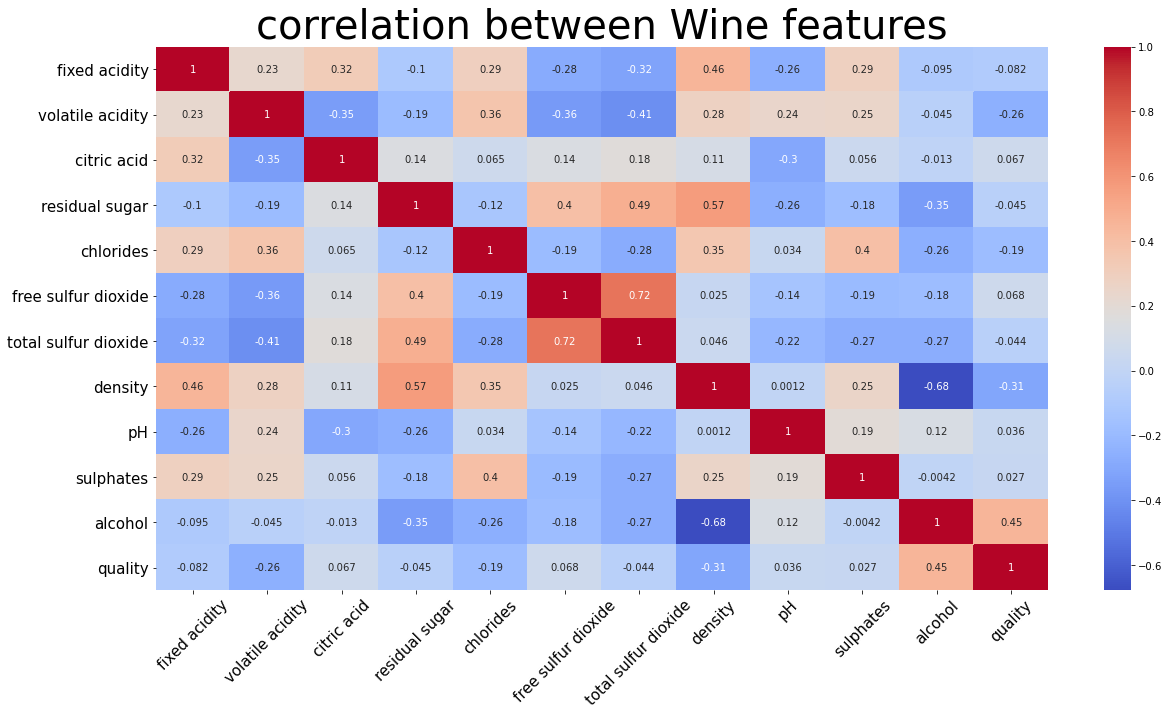

In [3]:
plt.figure(figsize=(20,10))

heat_table = train_df.drop(['id'],axis=1).corr()
heatmap_ax = sns.heatmap(heat_table, annot = True,cmap = 'coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(),fontsize=15,rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(),fontsize=15)
plt.title('correlation between Wine features',fontsize=40)
plt.show()

quality와 가장 높은 상관관계 : 알코올의 함유량  
해당 알코올을 등급을 나누어 분석해보는건 어떨까?  

In [23]:
train_df['alcohol'].describe()

count    3231.000000
mean       10.497108
std         1.193813
min         8.400000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

75% 이상을 high_alcohol,  
75% 미만을 low_alcohol로 분리한뒤 상관관계를 확인해보자

In [59]:
train_df['high alcohol'] = 0
train_df.loc[(train_df['alcohol'] >= 11.3),'high alcohol'] =1


In [64]:
alcohol_df = train_df
alcohol_df.drop('alcohol',axis=1,inplace=True)

In [65]:
alcohol_df

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,type,quality,high alcohol
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,white,6,1
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,white,7,1
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,white,6,1
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,white,5,0
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,red,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,white,5,0
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,white,6,0
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,white,5,0
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,white,6,0


In [75]:
corr.sort_values(ascending=False)

quality                 1.000000
high alcohol            0.387343
free sulfur dioxide     0.068432
citric acid             0.066630
pH                      0.036293
sulphates               0.026895
id                     -0.011903
total sulfur dioxide   -0.043504
residual sugar         -0.045225
fixed acidity          -0.081833
chlorides              -0.185623
volatile acidity       -0.255084
density                -0.309164
Name: quality, dtype: float64

In [101]:
value_df = train_df.loc[:,['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol','quality']]

In [117]:
value_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3231 non-null   float64
 1   volatile acidity      3231 non-null   float64
 2   citric acid           3231 non-null   float64
 3   residual sugar        3231 non-null   float64
 4   chlorides             3231 non-null   float64
 5   free sulfur dioxide   3231 non-null   float64
 6   total sulfur dioxide  3231 non-null   float64
 7   density               3231 non-null   float64
 8   pH                    3231 non-null   float64
 9   sulphates             3231 non-null   float64
 10  alcohol               3231 non-null   float64
 11  quality               3231 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 303.0 KB


In [130]:
value_df.iloc[:,:-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1
1,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0
2,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5
3,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4
4,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2
...,...,...,...,...,...,...,...,...,...,...,...
3226,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5
3227,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5
3228,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0
3229,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5


In [165]:
from scipy import stats
zscore_df = value_df.iloc[:,:-1].apply(stats.zscore)
zscore_df['quality'] = value_df['quality']

In [166]:
zscore_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.613164,-0.973871,0.346320,-0.862826,-0.444893,-0.896417,-0.363344,-1.135570,-0.952533,0.524814,1.342873,6
1,0.227151,0.274102,-0.202257,-0.115217,-0.976867,0.426604,-0.058413,-1.443438,-0.828960,-0.343803,2.096877,7
2,-0.853685,-0.412283,0.072032,-0.675924,-0.976867,-0.263668,0.013335,-1.987120,-0.581815,-1.546504,1.677986,6
3,-0.622077,-0.100290,1.237759,1.089263,-0.248903,1.519535,1.609735,0.698538,-0.828960,0.457997,-0.919137,5
4,0.921975,0.211703,0.757754,-0.655157,0.199075,-1.068985,-1.744499,0.272763,-0.272884,1.861148,0.588870,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3226,-0.622077,-1.098668,-0.065113,-0.032150,-0.360897,0.656695,0.730818,-0.038380,0.839268,-0.410620,0.002423,5
3227,-0.622077,-0.973871,-0.270829,2.407962,-0.248903,1.289444,0.407951,0.842646,0.221405,-1.212420,0.002423,6
3228,-0.930887,-0.349884,-0.476546,-0.758992,-0.388896,-1.299076,-0.148099,-0.578787,-0.828960,0.123914,-1.254250,5
3229,0.381557,-0.349884,-0.202257,0.300121,-0.416894,-0.091100,0.838440,0.174507,1.395344,0.457997,0.002423,6


In [163]:
zscore_df.loc['total_mean'] = zscore_df.sum(axis=0)

In [149]:
zscore_df['alcohol'].max()

3.688661556791884

In [180]:
zscore_df['total mean'] = 0.0

In [181]:
zscore_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total mean
0,0.613164,-0.973871,0.346320,-0.862826,-0.444893,-0.896417,-0.363344,-1.135570,-0.952533,0.524814,1.342873,6,0.0
1,0.227151,0.274102,-0.202257,-0.115217,-0.976867,0.426604,-0.058413,-1.443438,-0.828960,-0.343803,2.096877,7,0.0
2,-0.853685,-0.412283,0.072032,-0.675924,-0.976867,-0.263668,0.013335,-1.987120,-0.581815,-1.546504,1.677986,6,0.0
3,-0.622077,-0.100290,1.237759,1.089263,-0.248903,1.519535,1.609735,0.698538,-0.828960,0.457997,-0.919137,5,0.0
4,0.921975,0.211703,0.757754,-0.655157,0.199075,-1.068985,-1.744499,0.272763,-0.272884,1.861148,0.588870,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,-0.622077,-1.098668,-0.065113,-0.032150,-0.360897,0.656695,0.730818,-0.038380,0.839268,-0.410620,0.002423,5,0.0
3227,-0.622077,-0.973871,-0.270829,2.407962,-0.248903,1.289444,0.407951,0.842646,0.221405,-1.212420,0.002423,6,0.0
3228,-0.930887,-0.349884,-0.476546,-0.758992,-0.388896,-1.299076,-0.148099,-0.578787,-0.828960,0.123914,-1.254250,5,0.0
3229,0.381557,-0.349884,-0.202257,0.300121,-0.416894,-0.091100,0.838440,0.174507,1.395344,0.457997,0.002423,6,0.0


In [10]:
train_df.loc[train_df['quality'] >=7]['volatile acidity'].describe()

count    636.000000
mean       0.291973
std        0.120113
min        0.080000
25%        0.200000
50%        0.280000
75%        0.350000
max        0.850000
Name: volatile acidity, dtype: float64

In [11]:
train_df.loc[train_df['quality'] < 7]['volatile acidity'].describe()

count    2595.000000
mean        0.346881
std         0.166927
min         0.080000
25%         0.230000
50%         0.300000
75%         0.415000
max         1.040000
Name: volatile acidity, dtype: float64

In [17]:
word_to_num = {'white' : 0, 'red' : 1}
train_df['type'] = train_df['type'].replace(word_to_num)

In [57]:
type_df = pd.DataFrame({'Red' :  train_df[train_df['type'] == 0].quality,
             'White' :  train_df[train_df['type'] == 1].quality})
type_df = type_df.fillna(0)

<AxesSubplot:xlabel='Red', ylabel='count'>

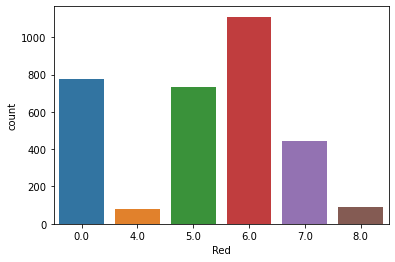

In [66]:
sns.countplot(type_df.Red)

In [70]:
type_df.Red.value_counts()

6.0    1110
0.0     778
5.0     732
7.0     444
8.0      88
4.0      79
Name: Red, dtype: int64

In [94]:
white_type = pd.DataFrame([type_df.White.value_counts()]).T
white_type = white_type.drop(0.0,axis=0)
white_type['ratio'] = np.round(white_type.White/sum(white_type.White),2)

In [106]:
white_type.sort_index()

,White,ratio
4.0,29,0.04
5.0,337,0.43
6.0,308,0.40
7.0,95,0.12
8.0,9,0.01


In [96]:
red_type = pd.DataFrame([type_df.Red.value_counts()]).T
red_type = red_type.drop(0.0,axis=0)
red_type['ratio'] = np.round(red_type.Red/sum(red_type.Red),2)

In [107]:
red_type.sort_index()

,Red,ratio
4.0,79,0.03
5.0,732,0.30
6.0,1110,0.45
7.0,444,0.18
8.0,88,0.04


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='White', ylabel='count'>

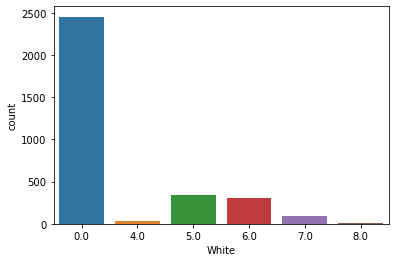

In [67]:
sns.countplot(type_df.White)

In [35]:
# 각 컬럼의 등급별 평균을 모아 해당 부분을 시각화
qualities = {}

for i in range(4,9):
    quality_description = train_df[train_df['quality'] == i].drop(['id','quality'],axis=1)
    if i == 4:
        means = pd.DataFrame({i : quality_description.median()})
    else:
        mean = pd.DataFrame({i : quality_description.median()})
        means = pd.concat([means,mean],axis=1)
        
means = means.T

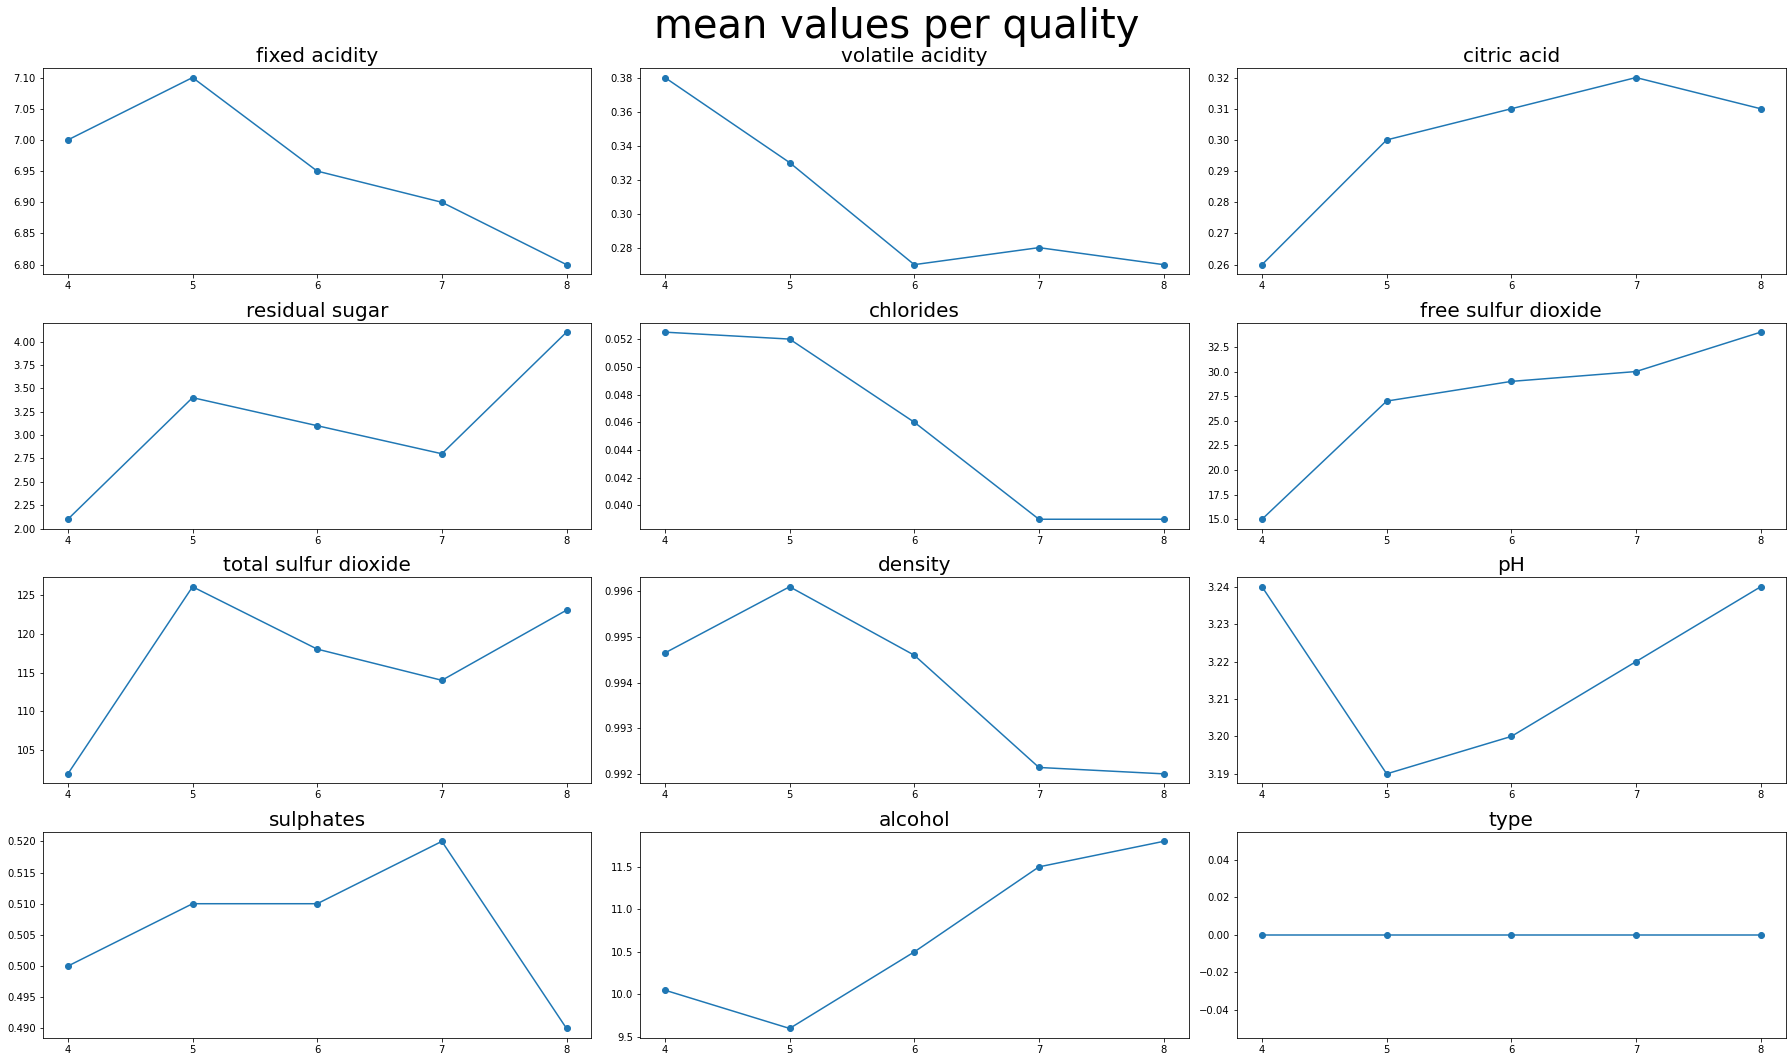

In [22]:
fig,axes = plt.subplots(4,3,figsize=(25,15))

fig.suptitle('mean values per quality', fontsize = 40)
for ax, col in zip(axes.flat,means.columns):
    ax.plot([4,5,6,7,8],means[col])
    ax.scatter([4,5,6,7,8],means[col])
    ax.set_title(col,fontsize = 20)
plt.setp(axes,xticks = [4,5,6,7,8])
plt.tight_layout()
plt.show()

In [110]:
train_df.isna().sum()

id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64

In [113]:
Corr=train_df.corr()
Corr_res=[]
for i in range(0,len(train_df.dtypes)):
    for j in range(0,len(train_df.dtypes)):
        value=Corr.iloc[i:i+1,j:j+1].values
        if value>0.8 and value!=1 :
            Corr_res.append(Corr.columns[i])

<ipython-input-113-66a5b41b579f>:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if value>0.8 and value!=1 :


In [114]:
Corr_res

[]